<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/Melvin_ml_t3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Stump

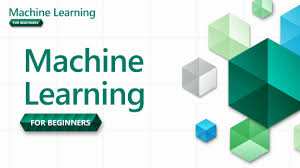

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#setup">A. setup</a>
  - <a href="#mount">a.1. Mount the google drive in colab </a>
  - <a href="#libraries">a.2. Installing Required Libraries</a>
  
- <a href="#tutorial1">I. Tutorial 1:Linear Regressor</a>  
  - <a href="#intro1">Introduction</a>

  - <a href="#part1">Part I: Linear Regressor By Hand </a>
    - <a href="#data1">1.1. Get the data </a>
    - <a href="#plot1">1.2 Plot the data</a>
    - <a href="#functions1">1.3 Functions</a>
    - <a href="#linearloop1">1.4 Linear Regressor Loop</a>
    - <a href="#gradient1">1.5 Visualize the gradient descent</a>
    - <a href="#tutorial1">1.6  Let’s check with NumPy</a>
  - <a href="#part2">Part II: Generalizing to n features with vectorized gradient descent </a>
    - <a href="#part1">Part II: Generalizing to n features with vectorized gradient descent</a>
    - <a href="#part1">Part III: Let’s get classy with OOP</a>
  - <a href="#part3">Part III: Let’s get classy with OOP</a>



<a id="setup"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **A-Setup**</p>

<a id="mount"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.1. Mount the Google Drive in colab</p>

Mounting  Google Drive to Colab  allows us to access and save files directly from our Drive, making it easier to work with our data and projects.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.2. Installing Required Libraries</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os



For this turorial, we will be using the following libraries:
 - [`pandas`] for managing the data.
 - [`numpy`] for mathematical operations.
 - [`seaborn`] for visualizing the data.
 - [`matplotlib`] for visualizing the data.
 - ['os'] for management system



<a id="tutorial1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **I-Tutorial 3:: Decision Stump**</p>

<a id="intro1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> Introduction</p>

**Higgs boson production modes**

In particle physics, the Higgs boson plays an essential role, in particular (pun intended) it gives massive particles their observed mass. The Higgs boson can be produced in different ways - we call this “Higgs boson production mechanism.” The main two production processes are:

    * gluon-gluon Fusion (ggF): two gluons, one from each of the incoming LHC protons, interact or “fuse” to create a Higgs boson.

    * Vector Boson Fusion (VBF): a quark from each of the incoming LHC protons radiates off a heavy vector boson (

or ). These bosons interact or “fuse” to produce a Higgs boson.



<a id="part1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part I: Decision Stump By Hand</p>

<a id="data1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.1. Get the data</p>

In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/intro_ML_data/ATLAS_higgs_train.csv')
df_test=pd.read_csv('/content/gdrive/MyDrive/intro_ML_data/ATLAS_higgs_test.csv')
df_val=pd.read_csv('/content/gdrive/MyDrive/intro_ML_data/ATLAS_higgs_valid.csv')

<a id="data1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.1.1 Explore the data</p>

In [ ]:
df_train.head(5)

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,68.515258,57.174385,4.283580,556.406882,-11,0.490221,-2.302279,68.776711,-11,0.910430,...,50.775758,11,-0.495413,-1.409834,28.700672,11,0.542029,-0.328558,17.054512,1
1,84.330551,25.551337,1.101106,266.768190,-11,1.291437,1.917571,77.658719,11,0.142028,...,61.922754,-13,0.208367,1.411837,30.645279,13,1.380638,0.300915,8.034711,-1
2,90.902327,30.404745,2.394863,211.879331,-13,0.702544,-0.946013,91.046750,13,0.958006,...,32.417166,11,0.385190,0.934649,17.942230,-11,0.672241,-1.410558,14.799019,-1
3,91.129112,26.609989,1.040268,56.235126,-11,-2.450392,3.123466,58.988305,11,-1.276226,...,30.001736,-13,-1.275654,0.280533,12.816265,13,-2.283192,-2.326921,11.448904,1
4,87.525977,32.304742,3.674720,351.241850,11,-1.303559,0.963711,66.502133,-11,-0.254885,...,26.519908,-13,-1.052104,0.041387,22.981393,13,0.099710,1.758643,12.038583,1


In [ ]:
df_test.head(5)

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,90.711948,25.922728,2.431133,173.757144,11,-0.849901,-2.728213,72.788969,-11,-0.750625,...,60.229039,-11,-0.545617,-2.015145,13.206232,11,-2.340391,-1.073797,10.162846,-1
1,58.631564,46.235702,2.620412,401.772362,-13,-2.309254,0.167833,57.749133,13,-1.107437,...,33.654371,13,-1.233964,0.641004,32.901371,-13,-0.792200,-1.808691,17.379645,-1
2,91.100929,28.130267,2.075246,225.324866,-11,-0.286215,-1.731155,122.398156,-11,-0.493687,...,24.173152,11,-1.921155,-0.438101,14.198083,11,-0.126846,-0.055109,12.707688,1
3,90.172605,22.277340,0.294412,60.658573,13,-0.388597,-1.856986,42.232105,-13,-2.003138,...,35.935008,13,0.237777,-2.934559,10.798683,-13,-1.028520,1.051412,8.909199,1
4,74.644403,16.199442,2.717867,147.172027,-11,1.361699,2.887043,51.820305,11,1.901612,...,40.411945,13,1.455313,-1.815577,21.598410,-13,0.429353,-1.864512,10.556684,-1


In [ ]:
df_val.head(5)

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,92.625176,15.832338,1.369244,48.008349,-13,-0.307903,-2.860112,60.734633,13,-1.016566,...,43.204020,11,-0.554183,2.603879,41.335656,-11,-0.172387,2.268117,23.392838,1
1,91.907955,25.685443,3.873142,235.563276,-11,0.844093,-1.792983,66.326172,11,1.317088,...,31.720260,-13,1.213664,2.718530,19.666490,13,0.451675,-2.273228,16.301108,1
2,91.745823,23.800073,2.115341,124.219932,-13,0.183692,-0.394481,46.524348,13,2.030162,...,34.021203,-13,-0.182918,0.460317,12.685531,13,0.963348,2.242634,11.495252,-1
3,86.971107,33.839986,3.207864,179.039714,-11,-0.447705,1.663203,59.828984,13,0.223414,...,23.460684,11,1.702710,2.436026,17.383080,-13,0.464166,-2.002312,12.287192,1
4,67.636158,45.087975,0.176287,16.913376,-11,-0.667105,-0.664787,61.410574,11,-0.388022,...,33.308695,13,-0.920548,-0.868262,29.113484,-13,-1.220419,2.274060,17.069893,-1


**Tasks:**

  * How many events does the file contain?

  * How many events of each process (VBF and ggF) does the file contain?


## **Number of events**

In [ ]:
print(f'the training data has ',df_train.shape[0], 'events')
print(f'the test data has ',df_test.shape[0],'events')
print(f'the validation test has',df_val.shape[0],'events')

the training data has  35000 events
the test data has  10000 events
the validation test has 2500 events


## **Number of events  of each process (VBF and ggF)**

In [ ]:
print(f'the training data has ',df_train[df_train['sample']== 1].shape[0],'VFB events')
print(f'the test data has ',df_test[df_test['sample']==1].shape[0],'VFB events')
print(f'the validation data has',df_val[df_val['sample']==1].shape[0],'VFB events')


the training data has  17500 VFB events
the test data has  5000 VFB events
the validation data has 1250 VFB events


In [ ]:
print(f'the training data has ',df_train[df_train['sample']== -1].shape[0],'ggF events')
print(f'the test data has ',df_test[df_test['sample']==-1].shape[0],'ggF events')
print(f'the validation data has',df_val[df_val['sample']==-1].shape[0],'ggF events')

the training data has  17500 ggF events
the test data has  5000 ggF events
the validation data has 1250 ggF events


<a id="plot1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.1.2 Visualize the Training Data</p>

In [ ]:
# Variables of interest
XNAME = 'detajj'; XLABEL = r'$|\Delta\eta_{jj}|$'
YNAME = 'massjj'; YLABEL = r'$m_{jj}$ (GeV)'

inputs = [XNAME, YNAME]

# Binning ranges
XBINS, XMIN, XMAX, XSTEP = 5, 0, 5, 1
YBINS, YMIN, YMAX, YSTEP = 5, 0, 1000, 200

# Split training data into signal and background
sig = df_train.loc[df_train['sample'] == 1, ['detajj', 'massjj']]
bkg = df_train.loc[df_train['sample']==-1,['detajj','massjj']]

In [ ]:
import matplotlib.pyplot as plt

FONTSIZE = 16
params = {
         'axes.labelsize': FONTSIZE,
         'axes.titlesize': FONTSIZE,
         'xtick.labelsize':FONTSIZE,
         'ytick.labelsize':FONTSIZE,
         'legend.fontsize':FONTSIZE}
plt.rcParams.update(params)

In [ ]:
def plot_scatter(sig, bkg,
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=8, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s=8, c='r', alpha=alpha, label='ggf')

  # Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title, pad=20)
  plt.show()

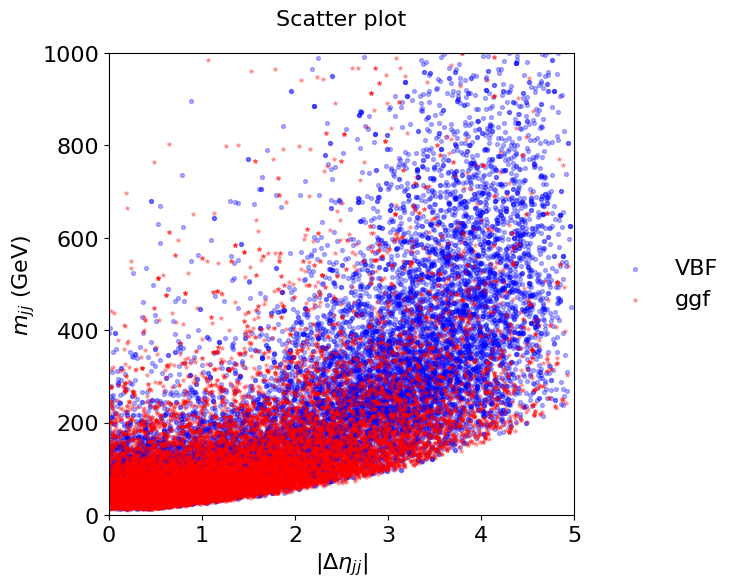

In [ ]:
plot_scatter(sig,bkg)

<a id="plot1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.1.3 Prepare Dataset (Features & Labels)</p>

In [ ]:
df_train[['detajj','massjj']].tonumpy()

AttributeError: 'DataFrame' object has no attribute 'tonumpy'

In [ ]:
# Extract detajj & massjj and convert to NumPy
X_train = np.array(df_train[['detajj','massjj']])
y_train = np.array(df_train['sample'])

<a id="function1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.2 Compute the Gini Index</p>

In [ ]:
len(y_train[y_train==1])

17500

In [ ]:
def get_gini_index(y, classes):
    """
    y       : NumPy array of labels in the node
    classes : list of possible class values (e.g., [-1, 1])
    """

    # ... your code here...
    sum_of_squares = 0
    N_i = len(y)
    if N_i != 0:
      for class_val in classes:
        N_ki = len(y[y == class_val])
        sum_of_squares += (N_ki / N_i)**2
      return 1 - sum_of_squares
    else:
      return 0

In [ ]:
get_gini_index(y_train,[-1,1])

0.5

<a id="function1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.3 Compute the Cost Function</p>

In [ ]:
def get_cost(n_left, gini_left, n_right, gini_right):
    """
        n_left      : Number of element
           gini_left: list of possible class values (e.g., [-1, 1])
        n_rigth     : Number of
             n_rigth: list of possible class values (e.g., [-1, 1])
    """

    # ... your code here


<a id="function1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.4 Decision Stump: Core of the Action</p>

In [ ]:
def get_threshold_min_cost(feature_values, y, classes, precision=0.01):
    """
    Find the threshold that minimizes the weighted Gini index.

    Parameters
    ----------
    ...

    Returns
    -------
    ...

    """

    # ... your code here


<a id="linearloop1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.5  What Is the Best Split?</p>

In [ ]:
get_threshold_min_cost(X_train,Y,y_train,precision=0.01)

<a id="check1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.6  Plot the Cut</p>

In [ ]:
def plot_scatter(sig, bkg,
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=8, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s=8, c='r', alpha=alpha, label='ggf')

  # Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title, pad=20)
  plt.show()

<a id="part2"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part II: Smarter Threshold Search</p>

<a id="part3"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part III:Chain It Recursively: From Stump to Tree</p>